# Блок 2. Поведенческая аналитика (проведение ad-hoc исследования) - Защита проекта

### ОПИСАНИЕ КЕЙСА
Я работаю продуктовым аналитиком в компании-сервисе по доставке продуктов на дом. Сервис доступен как в приложении на iOS, так и на Android. Я настроил фронтовую аналитику в AppMetrica, и в конце квартала маркетинг-менеджер попросил меня проанализировать поведение пользователей, а также оценить эффективность каналов их привлечения.

Данные из AppMetrica за период с 1 января по 31 марта 2020 — только по пользователям, зарегистрированным позднее 1 января 2020.


### Контрольные вопросы:
1. График с событиями по дням и ответ на вопросы: В каком месте маркетинг работает недостаточно хорошо? За счёт чего можно расти?
2. График с распределением трафика (открытие приложения) по группам «Установили в тот же день» и «Остальные».
3. График с динамикой установок приложения по каналам привлечения и ответ на вопрос: С каких платных каналов приходит больше и меньше всего пользователей?
4. Анализ: на каком этапе воронки отваливается большая часть клиентов (отдельно для зарегистрированных и для незарегистрированных пользователей). Сформулировать предложение по оптимизации.
5. Выбор лучшего и худшего каналов по конверсии в первую покупку.
6. Расчёт ROMI для всех каналов.
7. Таблица когорт (в абс. и %) по неделе первого посещения, выбор самой большой и самой активной когорт.
8. Таблица когорт (в абс. и %) по неделе первой покупки, выбор самой активной когорты и анализ динамики активности.
9. Расчёт среднего/медианного чека по когортам (недели первой покупки) в каждую неделю с момента первой покупки, указание диапазонов.


### ОПИСАНИЕ ДАННЫХ 

→ date — дата совершения события
→ event — событие
* app_install — установка приложения
* app_start —  открыть приложения
* registration — зарегистрироваться 
* search — перейти на страницу поиска товаров (каталог)
* open_item — открыть товар
* choose_item — отправить товар в корзину
* tap_basket — перейти в корзину
* purchase — подтверждение покупки
→ gender — пол пользователя
→ os_name —  платформа пользователя
→ city —  город пользователя
→ device_id — идентификатор устройства пользователя
→ utm_source — канал, с которого пришел пользователь
* yandex-direct — Яндекс.Директ
* google_ads — реклама в Google
* vk_ads — реклама в ВК
* instagram_ads — реклама в Instagram
* facebook_ads — реклама в Facebook
* referral — акция «приведи друга»
* Если стоит - (прочерк), то канал не определен или это скачивание приложения напрямую или посещение не с рекламы  
→ purchase_sum —  стоимость покупки (при совершении события ‘purchase’)


##### Обратить внимание!
В выгрузке только уникальные действия пользователей за каждый день.
Можно миновать стадию установки приложения, если оно было установлено ранее.
Можно миновать стадию регистрации, если пользователь был уже залогинен на момент сессии. Однако незарегистрированные пользователи не могут оформить покупку.

## Подготовка и преобразование данных

In [61]:
# Загружаем необходимые библиотеки:
import pandas as pd
import numpy as np
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import seaborn as sns
from matplotlib import pyplot as plt

# Создаём переменную df, в которую выгружаем данные из AppMetrica за период с 1 января по 31 марта 2020 
# — только по пользователям, зарегистрированным позднее 1 января 2020
df = pd.read_csv('SF_case_data.csv')

In [62]:
# Смотрим полученные данные:
df

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads
...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads


In [63]:
# Смотрим тип данных в переменной df:
display(df.info())

display(df.describe(include = 'all', datetime_is_numeric=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747968 entries, 0 to 2747967
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   event         object 
 2   purchase_sum  float64
 3   os_name       object 
 4   device_id     int64  
 5   gender        object 
 6   city          object 
 7   utm_source    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 167.7+ MB


None

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
count,2747968,2747968,141383.000000,2747968,2.747968e+06,2747968,2747968,2747968
unique,91,7,NaN,2,NaN,2,2,7
top,2020-01-10,app_start,NaN,android,NaN,female,Moscow,-
freq,89831,748705,NaN,1628119,NaN,1543644,1491481,610458
mean,NaN,NaN,709.116092,NaN,1.090841e+07,NaN,NaN,NaN
std,NaN,NaN,1289.458186,NaN,9.871445e+06,NaN,NaN,NaN
min,NaN,NaN,61.000000,NaN,4.013000e+03,NaN,NaN,NaN
25%,NaN,NaN,226.500000,NaN,1.975336e+06,NaN,NaN,NaN
50%,NaN,NaN,394.000000,NaN,8.731416e+06,NaN,NaN,NaN
75%,NaN,NaN,560.500000,NaN,1.736726e+07,NaN,NaN,NaN


### 1: 
##### График с событиями по дням и ответ на вопросы: В каком месте маркетинг работает недостаточно хорошо? За счёт чего можно расти?

In [64]:
# df[df.event == 'app_start'].groupby(['date']).sum()

# Группируем датафрейм по дате, выводим данные по всем событиям по дням в переменной df_grouped:
df_grouped = df.groupby(['date']).count().reset_index()
df_grouped = df_grouped[['date', 'event']]
df_grouped

,date,event
0,2020-01-01,19781
1,2020-01-02,21640
2,2020-01-03,20861
3,2020-01-04,19152
4,2020-01-05,21716
...,...,...
86,2020-03-27,27736
87,2020-03-28,22741
88,2020-03-29,21001
89,2020-03-30,20306


In [65]:
# Смотрим в какой день было больше всех событий:
# df_grouped[df_grouped.event == df_grouped.event.max()]

In [66]:
# Строим график с динамикой событий по дням - переменная fig1:
fig1 = px.line(df_grouped, x=df_grouped['date'], y=df_grouped['event'], title='График с динамикой по всем событиям по дням')
fig1.show()

### 1 - вывод:

##### 1. В каком месте маркетинг работает недостаточно хорошо? 
##### Ответ:
Если рассматривать динамику всех событий, совершённых пользователями в приложении по дням как результат работы маркетинга, то из графика выше видно, что маркетинг особенно проседает в следующие даты:
- с 1 по 8 января; 
- с середины января до 11 февраля; 
- с 15 по 20 февраля; 
- ~ с 23 февраля по 5 марта; 
- с 8 по 16 марта; с 27 по 31 марта. 

##### 2. За счёт чего можно расти?
##### Ответ:
Стоит отметить сезонность и влияние праздничных дней (Новый год, Международный женский день) на динамику событий в приложении, когда люди вероятнее всего больше времени уделяют праздничным мероприятиям и соответственно это сказывается на активности в приложении. Однако можно отметить и непродолжительные всплески активности в предпразничные дни (12-14 февраля, 5-6 марта), которые предположительно происходят по причине хорошей работы маркетинга. На мой взгляд, можно попробовать определить точки потенциального роста в послепраздничные дни, когда активность резко снижается и проводить дополнительные маркетинговые кампании для удержания высокой активности на более продолжительный период.

### 2:
##### График с распределением трафика (открытие приложения) по группам «Установили в тот же день» и «Остальные».

In [67]:
# Вспомним, что из себя представляет первоначальный датафрейм :
df.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads


In [68]:
# Оценим, какие уникальные события есть в колонке event
df.event.unique()

array(['app_start', 'choose_item', 'purchase', 'search', 'tap_basket',
       'app_install', 'register'], dtype=object)

In [69]:
# Создадим переменную installs для отражения всех пользователей с событием app_install :
installs = df[df.event == 'app_install']
installs

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
2515061,2020-01-01,app_install,NaN,ios,4921563,male,Moscow,vk_ads
2515062,2020-01-01,app_install,NaN,ios,1311583,male,Moscow,-
2515063,2020-01-01,app_install,NaN,android,23006325,male,Saint-Petersburg,-
2515064,2020-01-01,app_install,NaN,android,5645652,male,Moscow,-
2515065,2020-01-01,app_install,NaN,ios,8798567,male,Saint-Petersburg,referal
...,...,...,...,...,...,...,...,...
2669653,2020-03-31,app_install,NaN,ios,19717968,female,Moscow,-
2669654,2020-03-31,app_install,NaN,android,32966665,female,Saint-Petersburg,-
2669655,2020-03-31,app_install,NaN,ios,6335964,female,Moscow,referal
2669656,2020-03-31,app_install,NaN,android,29155826,male,Saint-Petersburg,vk_ads


In [70]:
# Создадим столбец с индексом device_id и значениями переменной installs :
df.device_id.map(installs.set_index('device_id')['date'])

0          2020-01-01
1          2020-01-01
2                 NaN
3          2020-01-01
4          2020-01-01
              ...    
2747963    2020-03-28
2747964    2020-03-31
2747965    2020-03-31
2747966    2020-03-06
2747967    2020-03-31
Name: device_id, Length: 2747968, dtype: object

In [71]:
# Добавим новый столбец c заданным условием в первоначальную таблицу df :
df['install_date'] = df.device_id.map(installs.set_index('device_id')['date'])
df.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,NaN
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01


In [72]:
# Смотрим сумму пустых значений по каждому столбцу:
df.isna().sum()

date                  0
event                 0
purchase_sum    2606585
os_name               0
device_id             0
gender                0
city                  0
utm_source            0
install_date     484945
dtype: int64

In [73]:
# Добавим переменную starts для отображения всех событий с открытием приложения:
starts = df[df.event == 'app_start'].sort_values('device_id')
# Смотрим первые 5 строк:
starts.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date
408942,2020-01-15,app_start,NaN,android,4013,female,Saint-Petersburg,vk_ads,2020-01-15
982775,2020-02-03,app_start,NaN,android,4014,male,Saint-Petersburg,referal,NaN
1002462,2020-02-04,app_start,NaN,android,4014,male,Saint-Petersburg,referal,NaN
1741389,2020-03-01,app_start,NaN,android,4014,male,Saint-Petersburg,referal,NaN
358419,2020-01-14,app_start,NaN,android,4014,male,Saint-Petersburg,referal,NaN


 - df[df.event == 'app_start'] - кол-во device_id с учётом дубликатов = 748705
 - df[df.event == 'app_start']['device_id'].nunique() - уникальное кол-во device_id = 190884

##### Поэтому, применим функцию drop_duplicates к device_id для отображения только уникальных идентификаторов устройств пользователей для событий с открытием приложения и запишем результат в переменную 'starts':

In [74]:
starts = df[df.event == 'app_start'].drop_duplicates('device_id').sort_values('device_id')
starts

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date
408942,2020-01-15,app_start,NaN,android,4013,female,Saint-Petersburg,vk_ads,2020-01-15
19400,2020-01-02,app_start,NaN,android,4014,male,Saint-Petersburg,referal,NaN
51507,2020-01-04,app_start,NaN,android,4016,female,Saint-Petersburg,yandex-direct,2020-01-04
2415406,2020-03-27,app_start,NaN,android,4018,male,Saint-Petersburg,-,NaN
50610,2020-01-04,app_start,NaN,android,4046,female,Saint-Petersburg,-,2020-01-04
...,...,...,...,...,...,...,...,...,...
2464148,2020-03-29,app_start,NaN,ios,35379281,male,Moscow,vk_ads,2020-03-29
2499000,2020-03-31,app_start,NaN,ios,35380796,female,Moscow,referal,2020-03-31
2480536,2020-03-30,app_start,NaN,android,35381595,male,Moscow,-,2020-03-30
2501826,2020-03-31,app_start,NaN,android,35388218,female,Saint-Petersburg,yandex-direct,2020-03-31


In [75]:
# Добавим столбец с датой открытия приложения в день установки приложения (first_open):  
df['first_open'] = df['device_id'].map(starts.set_index('device_id')['date'])
df

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01,2020-01-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01,2020-01-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,NaN,2020-01-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01-01,2020-01-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06


In [76]:
# Добавим столбец с признаками открытия приложения: 
# - в день установки («Установили в тот же день») 
# - и в другое время («Остальные»)
df['install_opening'] = np.where(df['first_open'] == df['install_date'], 'Установили в тот же день', 'Остальные')
df

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01,2020-01-01,Установили в тот же день
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,NaN,2020-01-01,Остальные
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день
...,...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28,Установили в тот же день
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31,Установили в тот же день
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06,Установили в тот же день


##### Группируем и отображаем пользователей по признаку открытий приложений в день установки приложений или в другой день:

In [77]:
group1 = df[df['install_opening'] == 'Установили в тот же день']
display(group1)

group2 = df[df['install_opening'] == 'Остальные']
display(group2)

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01,2020-01-01,Установили в тот же день
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день
5,2020-01-01,app_start,NaN,android,5148476,male,Saint-Petersburg,-,2020-01-01,2020-01-01,Установили в тот же день
...,...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28,Установили в тот же день
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31,Установили в тот же день
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06,Установили в тот же день


,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,NaN,2020-01-01,Остальные
21,2020-01-01,app_start,NaN,android,32967032,female,Moscow,yandex-direct,NaN,2020-01-01,Остальные
30,2020-01-01,app_start,NaN,android,7226703,female,Moscow,google_ads,NaN,2020-01-01,Остальные
34,2020-01-01,app_start,NaN,android,11559295,male,Saint-Petersburg,yandex-direct,NaN,2020-01-01,Остальные
47,2020-01-01,app_start,NaN,android,2849541,female,Moscow,instagram_ads,NaN,2020-01-01,Остальные
...,...,...,...,...,...,...,...,...,...,...,...
2747943,2020-03-31,register,NaN,android,18333025,male,Moscow,vk_ads,NaN,2020-03-31,Остальные
2747944,2020-03-31,register,NaN,ios,24113115,female,Moscow,facebook_ads,NaN,2020-03-31,Остальные
2747948,2020-03-31,register,NaN,ios,21617720,male,Moscow,yandex-direct,NaN,2020-03-31,Остальные
2747956,2020-03-31,register,NaN,android,31468146,male,Moscow,vk_ads,NaN,2020-03-31,Остальные


In [78]:
# Отображаем группу пользователей с признаком открытий приложений в день установки приложений - group1:
# (выбираем нужные столбцы, группируем по дате)
group1 = group1[['date', 'event', 'install_opening']]
group1 = group1.groupby(by = 'date').count().reset_index()
group1['install_opening'] = 'Установили в тот же день'
group1

,date,event,install_opening
0,2020-01-01,16623,Установили в тот же день
1,2020-01-02,18171,Установили в тот же день
2,2020-01-03,17343,Установили в тот же день
3,2020-01-04,15675,Установили в тот же день
4,2020-01-05,17824,Установили в тот же день
...,...,...,...
86,2020-03-27,22731,Установили в тот же день
87,2020-03-28,18714,Установили в тот же день
88,2020-03-29,17294,Установили в тот же день
89,2020-03-30,16651,Установили в тот же день


In [79]:
# Отображаем группу пользователей с признаком открытий приложений отличнающимся от дня установки приложений - group2 :
# (выбираем нужные столбцы, группируем по дате)
group2 = group2[['date', 'event', 'install_opening']]
group2 = group2.groupby(by = 'date').count().reset_index()
group2['install_opening'] = 'Остальные'
group2

,date,event,install_opening
0,2020-01-01,3158,Остальные
1,2020-01-02,3469,Остальные
2,2020-01-03,3518,Остальные
3,2020-01-04,3477,Остальные
4,2020-01-05,3892,Остальные
...,...,...,...
86,2020-03-27,5005,Остальные
87,2020-03-28,4027,Остальные
88,2020-03-29,3707,Остальные
89,2020-03-30,3655,Остальные


In [80]:
# Для возможности визуализации, объединяем обе группы в один датафрейм - groups:
groups = pd.concat([group1, group2])
groups = groups.reset_index()
groups

,index,date,event,install_opening
0,0,2020-01-01,16623,Установили в тот же день
1,1,2020-01-02,18171,Установили в тот же день
2,2,2020-01-03,17343,Установили в тот же день
3,3,2020-01-04,15675,Установили в тот же день
4,4,2020-01-05,17824,Установили в тот же день
...,...,...,...,...
177,86,2020-03-27,5005,Остальные
178,87,2020-03-28,4027,Остальные
179,88,2020-03-29,3707,Остальные
180,89,2020-03-30,3655,Остальные


In [81]:
# Визуализируем полученный датафрейм:
fig2 = px.line(groups, x='date', y='event', color = 'install_opening', \
               title='График с динамикой открытий приложений для групп «Установили в тот же день» и «Остальные»')
fig2.show()

In [82]:
# Например, смотрим количество событий в разрезе признаков на 31 января, 29 февраля и 31 марта 2020 г.:
display(groups[groups['date'] == '2020-01-31'])
display(groups[groups['date'] == '2020-02-29'])
display(groups[groups['date'] == '2020-03-31'])

,index,date,event,install_opening
30,30,2020-01-31,26762,Установили в тот же день
121,30,2020-01-31,6078,Остальные


,index,date,event,install_opening
59,59,2020-02-29,20157,Установили в тот же день
150,59,2020-02-29,4447,Остальные


,index,date,event,install_opening
90,90,2020-03-31,15682,Установили в тот же день
181,90,2020-03-31,3321,Остальные


In [83]:
# Посмотрим сколько людей установили приложение 31 марта :
display(df[(df['event'] == 'app_install') & (df['date'] == '2020-01-31')].date.value_counts())
display(df[(df['event'] == 'app_install') & (df['date'] == '2020-02-29')].date.value_counts())
display(df[(df['event'] == 'app_install') & (df['date'] == '2020-03-31')].date.value_counts())

2020-01-31    1965
Name: date, dtype: int64

2020-02-29    618
Name: date, dtype: int64

2020-03-31    968
Name: date, dtype: int64

### 2 - вывод:

На графике выше видно как распределяется трафик открытий приложения пользователями: динамика открытий приложений у пользователей из группы "Установили в тот же день" значительно выше, чем у группы "Остальные". Также, наблюдается прямая сильная корреляция между данными группами: сильный всплеск активности приходится на определённые даты (предпразничные, праздничные, послепразничные дни), поэтому данные колебания можно отнести либо к сезонности, когда пользователи больше времени проводят в приложении, либо к маркетинговым/рекламным кампаниям, привязанным к соответствующим сезонным датам.

### 3: 
##### График с динамикой установок приложения по каналам привлечения и ответ на вопрос: С каких платных каналов приходит больше и меньше всего пользователей?

In [86]:
# Отобразим события установки приложений (app_install), сгруппированных по каналу, с которого пришел пользователь (utm_source):
# (запишем результат в переменную utm_1)
utm_1 = df[df['event'] == 'app_install'].groupby('utm_source').size().reset_index(name = 'users')
utm_1

,utm_source,users
0,-,32460
1,facebook_ads,13916
2,google_ads,26286
3,instagram_ads,20096
4,referal,9282
5,vk_ads,23189
6,yandex-direct,29368


In [87]:
# Отобразим канал с максимально привлечённым количеством пользователей:
utm_1.sort_values('users', ascending=False)

,utm_source,users
0,-,32460
6,yandex-direct,29368
2,google_ads,26286
5,vk_ads,23189
3,instagram_ads,20096
1,facebook_ads,13916
4,referal,9282


Заметка: Прочерк в utm_source означает, что канал не определен или это скачивание приложения напрямую или посещение не с рекламы. По этой причине, мы не будем считать пользователей в данной категории как канал привлечения.

In [113]:
# Запишем исходный датафрейм df в новой переменной data:
data = df
# и составим функцию для визуализации динамики установок приложения по каналам привлечения:
def detalized_graphs(data, entity, x, y, title):
    data_for_plot = []
    for ent in set(data[entity]):
        entity_data = data[data[entity] == ent]
        trace = go.Scatter(x = entity_data[x], y = entity_data[y], name = ent)
        data_for_plot.append(trace)
        layout = {'title': title}
        fig = go.Figure(data = data_for_plot, layout = layout)
        iplot(fig, show_link = False)

In [115]:
# График с динамикой установок приложения по каналам привлечения:
df1 = df[df['event'] == 'app_install'].sort_values('date').drop_duplicates('device_id').groupby(['date','utm_source'])\
    .size().reset_index(name = 'users')
detalized_graphs(df1, 'utm_source', 'date', 'users', 'Динамика установок приложения по каналам привлечения')

###  3 - вывод:
##### С каких платных каналов приходит больше и меньше всего пользователей?

Из таблицы выше видим, что больше всего пользователей пришло с каналов: 
- yandex-direct: 29368, 
- google_ads: 26286 
- и vk_ads: 23189
меньше всего пользователей пришло с каналов: 
- referal - 9282, 
- facebook_ads - 13916, 
- instagram_ads - 20096


Заметка: в данном примере, реферальная программа (referal) рассматривается как канал привлечения.

### 4:
##### Анализ: на каком этапе воронки отваливается б'ольшая часть клиентов (отдельно для зарегистрированных и для незарегистрированных пользователей). Сформулируйте предложение по оптимизации.


Для этого создадим новые переменные с данными пользователей по событиям: регистрации, поиска... 
Чтобы выделить группы тех, кому нужно и не нужно регистрироваться, добавим столбец с датой регистрации в первоначальный датафрейм (df). Добавим столбец registered для определения групп зарегистрированных и незарегистрированных пользователей: если дата регистрации меньше даты совершения события, то пользователь уже зарегистрирован; если дата регистрации больше или равна дате совершения события, то пользователь ещё не зарегистрирован.

In [118]:
# Создаём новую переменную first_registration, в которую включаем всех зерегистрированных пользователей:
first_registration = df[df['event'] == 'register'].sort_values('date').drop_duplicates('device_id')
# Добавляем новый столбец, в котором присваиваем всем зерегистрированным пользователям - 1:
first_registration['finally_registered'] = 1
# Добавим в df дополнительный столбец по индексу device_id и значениями переменной first_registration:
df['first_registration'] = df['device_id'].map(first_registration.set_index('device_id')['date'])
df['finally_registered'] = df['device_id'].map(first_registration.set_index('device_id')['finally_registered'])
df

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01,2020-01-01,Установили в тот же день,2020-01-07,1.0
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,NaN,2020-01-01,Остальные,2020-01-01,1.0
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28,Установили в тот же день,2020-03-31,1.0
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31,1.0
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31,1.0
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06,Установили в тот же день,2020-03-31,1.0


In [120]:
# Задаём условие вывода уже зарегистрированных пользователей в новый датафрейм already_reg:
already_reg = df[df['first_registration'] < df['date']]
# already_reg - 1463946 rows × 10 columns

In [121]:
# Выключаем предупреждения (chained_assignment):
pd.options.mode.chained_assignment = None

In [122]:
# В датафрейм already_reg, добавляем столбец 'registered', в котором уже зарегистрированным пользователям присваиваем цифру 1:
already_reg['registered'] = 1
already_reg

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered,registered
15148,2020-01-02,app_start,NaN,ios,3163406,female,Moscow,instagram_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15175,2020-01-02,app_start,NaN,ios,2169108,female,Moscow,google_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15197,2020-01-02,app_start,NaN,android,4863305,male,Saint-Petersburg,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15210,2020-01-02,app_start,NaN,android,15248490,male,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15214,2020-01-02,app_start,NaN,ios,25617659,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515051,2020-03-31,tap_basket,NaN,ios,2421944,female,Moscow,google_ads,NaN,2020-02-14,Остальные,2020-02-27,1.0,1
2515053,2020-03-31,tap_basket,NaN,ios,9985819,female,Moscow,google_ads,2020-03-08,2020-03-08,Установили в тот же день,2020-03-24,1.0,1
2515054,2020-03-31,tap_basket,NaN,android,3043852,male,Moscow,-,2020-03-30,2020-03-30,Установили в тот же день,2020-03-30,1.0,1
2515056,2020-03-31,tap_basket,NaN,android,3162094,male,Moscow,referal,NaN,2020-01-01,Остальные,2020-01-13,1.0,1


In [130]:
# Теперь, из первоначального датафрейма (df) выделяем всех пользователей с пустыми значениями по столбцу first_registration
# - это ещё не зарегистрированные пользователи и поместим результат в новый датафрейм requires_reg1:
requires_reg1 = df[(df['first_registration'].isna() == True)]
requires_reg1

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN
9,2020-01-01,app_start,NaN,ios,10274354,female,Saint-Petersburg,instagram_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN
19,2020-01-01,app_start,NaN,ios,26876099,female,Moscow,google_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN
21,2020-01-01,app_start,NaN,android,32967032,female,Moscow,yandex-direct,NaN,2020-01-01,Остальные,NaT,NaN
23,2020-01-01,app_start,NaN,ios,1576132,male,Saint-Petersburg,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669652,2020-03-31,app_install,NaN,android,2261815,female,Saint-Petersburg,referal,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN
2669653,2020-03-31,app_install,NaN,ios,19717968,female,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN
2669654,2020-03-31,app_install,NaN,android,32966665,female,Saint-Petersburg,-,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN
2669655,2020-03-31,app_install,NaN,ios,6335964,female,Moscow,referal,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN


In [131]:
# В датафрейм requires_reg1, добавляем новый столбец registered и присваиваем всем ещё незарегистрированным пользователям - 0:
requires_reg1['registered'] = 0
requires_reg1

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered,registered
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN,0
9,2020-01-01,app_start,NaN,ios,10274354,female,Saint-Petersburg,instagram_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN,0
19,2020-01-01,app_start,NaN,ios,26876099,female,Moscow,google_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN,0
21,2020-01-01,app_start,NaN,android,32967032,female,Moscow,yandex-direct,NaN,2020-01-01,Остальные,NaT,NaN,0
23,2020-01-01,app_start,NaN,ios,1576132,male,Saint-Petersburg,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669652,2020-03-31,app_install,NaN,android,2261815,female,Saint-Petersburg,referal,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN,0
2669653,2020-03-31,app_install,NaN,ios,19717968,female,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN,0
2669654,2020-03-31,app_install,NaN,android,32966665,female,Saint-Petersburg,-,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN,0
2669655,2020-03-31,app_install,NaN,ios,6335964,female,Moscow,referal,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747968 entries, 0 to 2747967
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   event               object        
 2   purchase_sum        float64       
 3   os_name             object        
 4   device_id           int64         
 5   gender              object        
 6   city                object        
 7   utm_source          object        
 8   install_date        object        
 9   first_open          object        
 10  install_opening     object        
 11  first_registration  datetime64[ns]
 12  finally_registered  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 272.5+ MB


In [133]:
# Приведём данные времени к формату, с которым можно работать.
df['date'] = pd.to_datetime(df['date'])
df['first_registration'] = pd.to_datetime(df['first_registration'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747968 entries, 0 to 2747967
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   event               object        
 2   purchase_sum        float64       
 3   os_name             object        
 4   device_id           int64         
 5   gender              object        
 6   city                object        
 7   utm_source          object        
 8   install_date        object        
 9   first_open          object        
 10  install_opening     object        
 11  first_registration  datetime64[ns]
 12  finally_registered  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 272.5+ MB


In [135]:
# Задаём условие вывода ещё незарегистрированных пользователей из df в новую переменную requires_reg2:
requires_reg2 =  df[df['first_registration'] >= df['date']]
requires_reg2

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01,2020-01-01,Установили в тот же день,2020-01-07,1.0
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,NaN,2020-01-01,Остальные,2020-01-01,1.0
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0
5,2020-01-01,app_start,NaN,android,5148476,male,Saint-Petersburg,-,2020-01-01,2020-01-01,Установили в тот же день,2020-01-24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28,Установили в тот же день,2020-03-31,1.0
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31,1.0
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31,1.0
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06,Установили в тот же день,2020-03-31,1.0


In [139]:
# В requires_reg2 добавляем новый столбец registered, в котором присваиваем всем незарегистрированным пользователям - 0 
requires_reg2['registered'] = 0
requires_reg2

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered,registered
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01,2020-01-01,Установили в тот же день,2020-01-07,1.0,0
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,0
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,NaN,2020-01-01,Остальные,2020-01-01,1.0,0
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,0
5,2020-01-01,app_start,NaN,android,5148476,male,Saint-Petersburg,-,2020-01-01,2020-01-01,Установили в тот же день,2020-01-24,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28,Установили в тот же день,2020-03-31,1.0,0
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31,1.0,0
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31,1.0,0
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06,Установили в тот же день,2020-03-31,1.0,0


In [140]:
# Объединяем 3 созданных ранее датафрейма и перезаписываем в датафрейм df2:
df2 = pd.concat([already_reg, requires_reg1, requires_reg2])
df2

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered,registered
15148,2020-01-02,app_start,NaN,ios,3163406,female,Moscow,instagram_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15175,2020-01-02,app_start,NaN,ios,2169108,female,Moscow,google_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15197,2020-01-02,app_start,NaN,android,4863305,male,Saint-Petersburg,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15210,2020-01-02,app_start,NaN,android,15248490,male,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15214,2020-01-02,app_start,NaN,ios,25617659,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31 00:00:00,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28,Установили в тот же день,2020-03-31 00:00:00,1.0,0
2747964,2020-03-31 00:00:00,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31 00:00:00,1.0,0
2747965,2020-03-31 00:00:00,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31 00:00:00,1.0,0
2747966,2020-03-31 00:00:00,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06,Установили в тот же день,2020-03-31 00:00:00,1.0,0


In [141]:
# Выводим отдельные события, в разрезе групп зарегистрированных и незарегистрированных пользователей:
display(df2[df2['event'] == 'app_install'].groupby('registered').count())
display(df2[df2['event'] == 'app_start'].groupby('registered').count())
display(df2[df2['event'] == 'registration'].groupby('registered').count())
display(df2[df2['event'] == 'search'].groupby('registered').count())
display(df2[df2['event'] == 'open_item'].groupby('registered').count())
display(df2[df2['event'] == 'choose_item'].groupby('registered').count())
display(df2[df2['event'] == 'tap_basket'].groupby('registered').count())
display(df2[df2['event'] == 'purchase'].groupby('registered').count())

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
registered,,,,,,,,,,,,,
0,154597,154597,0,154597,154597,154597,154597,154597,154597,154597,154597,63526,63526


,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
registered,,,,,,,,,,,,,
0,307219,307219,0,307219,307219,307219,307219,307219,249033,307219,307219,153236,153236
1,441486,441486,0,441486,441486,441486,441486,441486,359668,441486,441486,441486,441486


,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
registered,,,,,,,,,,,,,


,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
registered,,,,,,,,,,,,,
0,291538,291538,0,291538,291538,291538,291538,291538,236328,291538,291538,148170,148170
1,417101,417101,0,417101,417101,417101,417101,417101,339712,417101,417101,417101,417101


,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
registered,,,,,,,,,,,,,


,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
registered,,,,,,,,,,,,,
0,224196,224196,0,224196,224196,224196,224196,224196,181586,224196,224196,125994,125994
1,314473,314473,0,314473,314473,314473,314473,314473,256218,314473,314473,314473,314473


,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
registered,,,,,,,,,,,,,
0,160409,160409,0,160409,160409,160409,160409,160409,130022,160409,160409,105031,105031
1,217256,217256,0,217256,217256,217256,217256,217256,177108,217256,217256,217256,217256


,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered
registered,,,,,,,,,,,,,
0,67753,67753,67753,67753,67753,67753,67753,67753,54966,67753,67753,67753,67753
1,73630,73630,73630,73630,73630,73630,73630,73630,60259,73630,73630,73630,73630


In [142]:
# Скопируем датафрейм df2 с зарегистрированными пользователями в новый датафрейм reg:
reg = df2[df2['registered'] == 1]
reg

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered,registered
15148,2020-01-02,app_start,NaN,ios,3163406,female,Moscow,instagram_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15175,2020-01-02,app_start,NaN,ios,2169108,female,Moscow,google_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15197,2020-01-02,app_start,NaN,android,4863305,male,Saint-Petersburg,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15210,2020-01-02,app_start,NaN,android,15248490,male,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
15214,2020-01-02,app_start,NaN,ios,25617659,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515051,2020-03-31,tap_basket,NaN,ios,2421944,female,Moscow,google_ads,NaN,2020-02-14,Остальные,2020-02-27,1.0,1
2515053,2020-03-31,tap_basket,NaN,ios,9985819,female,Moscow,google_ads,2020-03-08,2020-03-08,Установили в тот же день,2020-03-24,1.0,1
2515054,2020-03-31,tap_basket,NaN,android,3043852,male,Moscow,-,2020-03-30,2020-03-30,Установили в тот же день,2020-03-30,1.0,1
2515056,2020-03-31,tap_basket,NaN,android,3162094,male,Moscow,referal,NaN,2020-01-01,Остальные,2020-01-13,1.0,1


### 4.1 - зарегистрированные пользователи:

In [196]:
# Формируем таблицу кросс-табуляции с частотой зарегистрированных пользователей в разрезе событий и каналов привлечения:
funnel_reg = pd.crosstab(reg.utm_source, reg.event, values = reg.device_id, aggfunc = pd.Series.nunique)
funnel_reg

event,app_start,choose_item,purchase,search,tap_basket
utm_source,,,,,
-,9482,8728,5492,9355,7850
facebook_ads,5606,5154,3333,5527,4694
google_ads,5399,4948,3121,5335,4438
instagram_ads,5686,5288,3548,5618,4842
referal,3647,3417,2382,3610,3155
vk_ads,6011,5636,3950,5958,5196
yandex-direct,5396,4928,3099,5304,4464


In [197]:
# Шаги воронки, отсортированные от наибольшего общего количества зарегистрированных пользователей к наименьшему:
funnel_reg2 = pd.crosstab(reg.event, reg.utm_source, margins = True, margins_name = 'Total').sort_values('Total', ascending=False)
funnel_reg2

utm_source,-,facebook_ads,google_ads,instagram_ads,referal,vk_ads,yandex-direct,Total
event,,,,,,,,
Total,326661,194798,177138,212201,144154,230827,178167,1463946
app_start,98478,58848,53623,63968,43391,69335,53843,441486
search,93095,55505,50641,60453,40987,65515,50905,417101
choose_item,70355,41840,37950,45535,31025,49506,38262,314473
tap_basket,48455,28892,26222,31463,21415,34430,26379,217256
purchase,16278,9713,8702,10782,7336,12041,8778,73630


In [198]:
# Шаги воронки: app_install > app_start > registration > search > open_item > choose_item > tap_basket > purchase

# Добавляем столбцы с событиями, в которых рассчитываем конверсию на каждом шаге воронки:
funnel_reg['search/app_start'] = funnel_reg['search']*100/funnel_reg['app_start']
funnel_reg['choose_item/search'] = funnel_reg['choose_item']*100/funnel_reg['search']
funnel_reg['tap_basket/choose_item'] = funnel_reg['tap_basket']*100/funnel_reg['choose_item']
funnel_reg['purchase/tap_basket'] = funnel_reg['purchase']*100/funnel_reg['tap_basket']
funnel_reg

event,app_start,choose_item,purchase,search,tap_basket,search/app_start,choose_item/search,tap_basket/choose_item,purchase/tap_basket
utm_source,,,,,,,,,
-,9482,8728,5492,9355,7850,98.660620,93.297702,89.940422,69.961783
facebook_ads,5606,5154,3333,5527,4694,98.590796,93.251312,91.074893,71.005539
google_ads,5399,4948,3121,5335,4438,98.814595,92.746017,89.692805,70.324470
instagram_ads,5686,5288,3548,5618,4842,98.804080,94.126023,91.565809,73.275506
referal,3647,3417,2382,3610,3155,98.985468,94.653740,92.332455,75.499208
vk_ads,6011,5636,3950,5958,5196,99.118283,94.595502,92.193045,76.020015
yandex-direct,5396,4928,3099,5304,4464,98.295033,92.911011,90.584416,69.422043


In [199]:
display(len(reg[reg.event == 'tap_basket'].drop_duplicates('device_id')))
display(len(reg[reg.event == 'purchase'].drop_duplicates('device_id')))
display(len(reg[reg.event == 'purchase'].drop_duplicates('device_id')) /\
       len(reg[reg.event == 'tap_basket'].drop_duplicates('device_id')))

34517

24880

0.7208042413883015

### 4.1 - вывод:
Таким образом, большая часть зарегистрированных пользователей отваливается на этапе покупки (purchase/tap_basket). 

- На этапе добавления в корзину, всего - 217256, уникальных пользователей - 34517; 
- на этапе покупки, всего - 73630, уникальных пользователей - 24880;
* Конверсия уникальных пользователей из этапа добавления в корзину в покупку: 72%. 

Можно попробовать оптимизировать сам процесс покупки, т.е. на шаге добавления товара в корзину, добавить опцию автоматической покупки или другое альтернативное решение. Тем не менее, на шаге из добавления в корзину в покупку, *конверсия у зарегистрированных пользователей выше - 72%, чем **конверсия у незарегистрированных пользователей - 54% (См. ниже **конверсия у незарегистрированных пользователей).

### 4.2 - незарегистрированные пользователи:

In [200]:
# Скопируем датафрейм df2 с незарегистрированными пользователями в новый датафрейм not_reg:
not_reg = df2[df2['registered'] == 0]
not_reg

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered,registered
4,2020-01-01 00:00:00,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN,0
9,2020-01-01 00:00:00,app_start,NaN,ios,10274354,female,Saint-Petersburg,instagram_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN,0
19,2020-01-01 00:00:00,app_start,NaN,ios,26876099,female,Moscow,google_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN,0
21,2020-01-01 00:00:00,app_start,NaN,android,32967032,female,Moscow,yandex-direct,NaN,2020-01-01,Остальные,NaT,NaN,0
23,2020-01-01 00:00:00,app_start,NaN,ios,1576132,male,Saint-Petersburg,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31 00:00:00,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28,Установили в тот же день,2020-03-31 00:00:00,1.0,0
2747964,2020-03-31 00:00:00,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31 00:00:00,1.0,0
2747965,2020-03-31 00:00:00,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31 00:00:00,1.0,0
2747966,2020-03-31 00:00:00,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06,Установили в тот же день,2020-03-31 00:00:00,1.0,0


In [201]:
# Формируем таблицу кросс-табуляции с частотой незарегистрированных пользователей в разрезе событий и каналов привлечения:
funnel_not_reg = pd.crosstab(not_reg.utm_source, not_reg.event, values = not_reg.device_id, aggfunc = pd.Series.nunique)
funnel_not_reg

event,app_install,app_start,choose_item,purchase,register,search,tap_basket
utm_source,,,,,,,
-,32460,48670,38026,14073,16527,46742,29223
facebook_ads,13916,23780,18713,7506,8672,22822,14592
google_ads,26286,35778,27416,9777,11405,34217,20765
instagram_ads,20096,29237,22858,9394,10750,28017,17881
referal,9282,14866,11880,5503,6193,14316,9518
vk_ads,23189,32353,25422,10919,12421,31010,20014
yandex-direct,29368,38578,29591,10581,12342,36933,22417


In [202]:
# Шаги воронки, отсортированные от наибольшего общего количества незарегистрированных пользователей к наименьшему:
funnel_not_reg2 = pd.crosstab(not_reg.event, not_reg.utm_source, margins = True, margins_name = 'Total').sort_values('Total', ascending=False)
funnel_not_reg2

utm_source,-,facebook_ads,google_ads,instagram_ads,referal,vk_ads,yandex-direct,Total
event,,,,,,,,
Total,283797,142155,197119,170690,90567,187629,212065,1284022
app_start,69328,35119,47003,40614,21493,43664,49998,307219
search,65750,33281,44552,38536,20456,41482,47481,291538
choose_item,50240,25511,33976,29793,15972,32311,36393,224196
tap_basket,35419,18150,24120,21507,11668,23643,25902,160409
app_install,32460,13916,26286,20096,9282,23189,29368,154597
register,16527,8672,11405,10750,6193,12421,12342,78310
purchase,14073,7506,9777,9394,5503,10919,10581,67753


In [203]:
# Шаги воронки: app_install > app_start > registration > search > open_item > choose_item > tap_basket > purchase

# Добавляем столбцы с событиями, в которых рассчитываем конверсию на каждом шаге воронки:
funnel_not_reg['sear/app_st'] = funnel_not_reg['search']*100/funnel_not_reg['app_start']
funnel_not_reg['choose_i/sear'] = funnel_not_reg['choose_item']*100/funnel_not_reg['search']
funnel_not_reg['tap_b/choose_i'] = funnel_not_reg['tap_basket']*100/funnel_not_reg['choose_item']
funnel_not_reg['reg/tap_b'] = funnel_not_reg['register']*100/funnel_not_reg['tap_basket']
funnel_not_reg['pur/reg'] = funnel_not_reg['purchase']*100/funnel_not_reg['register']
funnel_not_reg

event,app_install,app_start,choose_item,purchase,register,search,tap_basket,sear/app_st,choose_i/sear,tap_b/choose_i,reg/tap_b,pur/reg
utm_source,,,,,,,,,,,,
-,32460,48670,38026,14073,16527,46742,29223,96.038627,81.352959,76.850050,56.554769,85.151570
facebook_ads,13916,23780,18713,7506,8672,22822,14592,95.971405,81.995443,77.977876,59.429825,86.554428
google_ads,26286,35778,27416,9777,11405,34217,20765,95.636984,80.123915,75.740444,54.924151,85.725559
instagram_ads,20096,29237,22858,9394,10750,28017,17881,95.827205,81.586180,78.226442,60.119680,87.386047
referal,9282,14866,11880,5503,6193,14316,9518,96.300283,82.984074,80.117845,65.066190,88.858389
vk_ads,23189,32353,25422,10919,12421,31010,20014,95.848917,81.980006,78.727087,62.061557,87.907576
yandex-direct,29368,38578,29591,10581,12342,36933,22417,95.735912,80.120759,75.756142,55.056430,85.731648


In [204]:
display(len(not_reg[not_reg.event == 'register'].drop_duplicates('device_id')))
display(len(not_reg[not_reg.event == 'app_install'].drop_duplicates('device_id')))


display(len(not_reg[not_reg.event == 'tap_basket'].drop_duplicates('device_id')))
display(len(not_reg[not_reg.event == 'purchase'].drop_duplicates('device_id')))
display(len(not_reg[not_reg.event == 'purchase'].drop_duplicates('device_id')) /\
        len(not_reg[not_reg.event == 'tap_basket'].drop_duplicates('device_id')))

78310

154597

125414

67753

0.5402347425327316

### 4.2 - вывод:

Большая часть незарегистрированных пользователей отваливается на этапе регистрации (reg/tap_b). 

- На этапе регистрации, всего - 78310, уникальных пользователей - 78310;
- На этапе установки приложения - 154597,  уникальных пользователей - 154597;
- На этапе добавления в корзину, всего - 160409, уникальных пользователей - 125414; 
- на этапе покупки, всего - 67753, уникальных пользователей - 67753;
** Конверсия уникальных пользователей из этапа добавления в корзину в покупку: 54.02%. 

Для незарегистрированных пользователей, можно оптимизировать сам процесс регистрации, т.к. на шаге регистрации (78310 уникальных пользователей) отваливаются почти половина пользователей от установивших приложение - 154597. На этапе из добавления товара в корзину в покупку, стоит подумать над возможностью добавления опции автоматической покупки или другого альтернативного решения для повышения конверсии на данном этапе, с текущего показателя 54% до как минимум 72% >>> (См. выше *конверсия у зарегистрированных пользователей).


**Дисклеймер: на шаге из добавления в корзину в покупку, расчёт конверсии для незарегистрированных пользователей производится в сравнительных целях и не является показателем наименьшей конверсии для данной группы пользователей.

### 5: 
##### Выбор лучшего и худшего каналов по конверсии в первую покупку.

In [209]:
# Создаём новую переменную, в которую включаем всех пользователей, открывших приложение:
df2['date'] = pd.to_datetime(df['date'])
first_opening = df2[df2['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id').groupby('utm_source').\
                size().reset_index(name = 'users')
first_opening

,utm_source,users
0,-,41456
1,facebook_ads,18844
2,google_ads,31437
3,instagram_ads,24818
4,referal,11983
5,vk_ads,27905
6,yandex-direct,34441


In [210]:
# Создаём новую переменную, в которую включаем всех пользователей, совершивших первую покупку:
first_purchase = df2.loc[df['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby('utm_source').\
                size().reset_index(name = 'users')
first_purchase

,utm_source,users
0,-,14786
1,facebook_ads,7903
2,google_ads,10167
3,instagram_ads,9820
4,referal,5803
5,vk_ads,11460
6,yandex-direct,10936


In [213]:
# Объединяем полученные датафреймы:
stat = first_opening.merge(first_purchase, how = 'left', on = 'utm_source')
# stat = stat.rename(columns = {'users_x': 'first_opening', 'users_y': 'first_purchase'})
stat['CR_to_first_purchase'] = stat['users_y'] / stat['users_x']
# Сортируем от наибольшей к наименьшей конверсии в покупку:
stat.sort_values('CR_to_first_purchase', ascending = False)

,utm_source,users_x,users_y,CR_to_first_purchase
4,referal,11983,5803,0.484269
1,facebook_ads,18844,7903,0.419391
5,vk_ads,27905,11460,0.410679
3,instagram_ads,24818,9820,0.395681
0,-,41456,14786,0.356667
2,google_ads,31437,10167,0.323409
6,yandex-direct,34441,10936,0.317529


### 5 - вывод:

Таким образом, наибольшую конверсию в покупку показывает реферальная программа (referal) - 48.43%, а наименьшую конверсию в покупку показывает канал привлечения yandex-direct - 31.75%. Соответственно, лучший канал привлечения - это referal, а худший канал привлечения - это yandex-direct.

### 6: 
##### Расчёт ROMI для всех каналов.


Определение:
ROMI - Return On Marketing Investment (Рентабельность Инвестиций В Маркетинг или Коэффициент Возврата Маркетинговых Инвестиций)

Формула:
ROMI = ((Доходы от Маркетинга - Расходы на маркетинг) / Расходы на маркетинг) * 100%


Данные по затратам на рекламу в Q1:
    Яндекс	    10 491 707 руб.
    Гугл	    10 534 878 руб.
    Фейсбук	     8 590 498 руб.
    Инстаграм	 8 561 626 руб.
    ВК	         9 553 531 руб.    

Расходы на реферальную программу: если пользователь приведет друга и последний совершит первую покупку, то оба получат по 100 рублей.


Заметка: затраты на рекламу учитываются за 1 квартал рассматриваемого периода.

In [214]:
# Рассчитываем доход по каждому каналу привлечения:
df2[df2.event == 'purchase'].groupby('utm_source')['purchase_sum'].sum()

utm_source
-                21449749.5
facebook_ads     12249901.0
google_ads       12868276.0
instagram_ads    14546969.0
referal           8837044.5
vk_ads           16389652.5
yandex-direct    13915368.0
Name: purchase_sum, dtype: float64

In [231]:
# Рассчитываем и выводим ROMI по каждому каналу привлечения, в %:
print('Яндекс:    {:.4}%'.format((13915368/10491707-1)*100))
print('Гугл:      {:.4}%'.format((12868276/10534878-1)*100))
print('Фейсбук:   {:.4}%'.format((12249901/8590498-1)*100))
print('Инстаграм: {:.4}%'.format((14546969/8561626-1)*100))
print('ВК:        {:.4}%'.format((16389652.5/9553531-1)*100))

Яндекс:    32.63%
Гугл:      22.15%
Фейсбук:   42.6%
Инстаграм: 69.91%
ВК:        71.56%


In [235]:
# Выводим количество уникальных пользователей по всем каналам, чтобы отдельно рассчитать расходы по реферальной программе:
df2[df2.event == 'purchase'].drop_duplicates('device_id')['utm_source'].value_counts()

-                15179
vk_ads           11135
yandex-direct    10608
google_ads        9968
instagram_ads     9787
facebook_ads      8324
referal           5874
Name: utm_source, dtype: int64

In [238]:
# Определяем доход по реферальной программе:
referal_revenue = 8837044.5
# Определяем 5874 пользователей по реферальной программе: рассчитываем расходы по программе за рассматриваемый период:
referal_cost = 5874*(2*100)

In [240]:
# Рассчитываем ROI по реферальной программе:
referal_roi = (referal_revenue/referal_cost-1)*100
referal_roi = round(referal_roi, 2)
referal_roi

652.22

### 6 - вывод:

Из рекламных каналов привлечения (кроме реферальной программы), самый высокий ROMI у ВК (vk_ads) - 71.56%, а самый самый низкий ROMI у Гугл (google_ads) - 22.15%. 
Самая выгодная опция — реферальная программа, которая за 3 месяца привлекла 5874 пользователей и принесла доход 8837044.5 рублей, а расходы составили всего 1174800 рублей (5874*(2*100)). Таким образом, ROI по реферальной программе составил 652.22% - это самая выгодная опция.

### 7: 
##### Таблица когорт (в абс. и %) по неделе первого посещения, выбор самой большой и самой активной когорт.

> В данном расчёте, точкой отсчёта при построении недельных когорт является: неделя первого посещения (first_entrance_cohort)

In [241]:
# Создаём переменную с данными пользователей, открывавших приложения - избавляемся от дубликатов по device_id:
entrances = df2[df2.event == 'app_start'].sort_values('date').drop_duplicates('device_id')
entrances

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered,registered
3335,2020-01-01,app_start,NaN,android,198435,male,Saint-Petersburg,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-03 00:00:00,1.0,0
1999,2020-01-01,app_start,NaN,android,9279324,male,Moscow,yandex-direct,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01 00:00:00,1.0,0
1997,2020-01-01,app_start,NaN,ios,9069447,male,Saint-Petersburg,instagram_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-06 00:00:00,1.0,0
1995,2020-01-01,app_start,NaN,ios,8058489,female,Moscow,-,NaN,2020-01-01,Остальные,2020-01-04 00:00:00,1.0,0
1993,2020-01-01,app_start,NaN,android,7105494,male,Moscow,yandex-direct,NaN,2020-01-01,Остальные,2020-01-01 00:00:00,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499113,2020-03-31,app_start,NaN,android,29313543,female,Moscow,facebook_ads,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN,0
2499112,2020-03-31,app_start,NaN,android,22501429,male,Saint-Petersburg,facebook_ads,NaN,2020-03-31,Остальные,NaT,NaN,0
2499097,2020-03-31,app_start,NaN,ios,2041985,female,Moscow,instagram_ads,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN,0
2499089,2020-03-31,app_start,NaN,android,34124302,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,NaT,NaN,0


In [242]:
# Добавляем новый столбец с датами открытия приложения - первого входа уникальными пользователями, в датафрейм df2:
df2['first_entrance'] = df2['device_id'].map(entrances.set_index('device_id')['date'])
df2

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered,registered,first_entrance
15148,2020-01-02,app_start,NaN,ios,3163406,female,Moscow,instagram_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01
15175,2020-01-02,app_start,NaN,ios,2169108,female,Moscow,google_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01
15197,2020-01-02,app_start,NaN,android,4863305,male,Saint-Petersburg,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01
15210,2020-01-02,app_start,NaN,android,15248490,male,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01
15214,2020-01-02,app_start,NaN,ios,25617659,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-28
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-31
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-31
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-06


In [248]:
# Если формат времени не задан, то переведём в нужный формат: 
df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')
df2['first_entrance'] = pd.to_datetime(df2['first_entrance'], format = '%Y-%m-%d')

In [249]:
# Добавляем новый столбец с датами открытия приложения - первого входа по недельной когорте:
df2['first_entrance_cohort'] = df2['first_entrance'].apply(lambda x: x + dt.timedelta(days = -x.weekday(), weeks=0))
df2

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered,registered,first_entrance,first_entrance_cohort
15148,2020-01-02,app_start,NaN,ios,3163406,female,Moscow,instagram_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01,2019-12-30
15175,2020-01-02,app_start,NaN,ios,2169108,female,Moscow,google_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01,2019-12-30
15197,2020-01-02,app_start,NaN,android,4863305,male,Saint-Petersburg,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01,2019-12-30
15210,2020-01-02,app_start,NaN,android,15248490,male,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01,2019-12-30
15214,2020-01-02,app_start,NaN,ios,25617659,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-28,2020-03-23
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-31,2020-03-30
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-31,2020-03-30
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-06,2020-03-02


In [251]:
# Добавляем переменную, в которой считаем количество недельных когорт = дата события - дата первого входа по недельной когорте:
df2['n_week'] = df2['date'] - df2['first_entrance_cohort']
df2['n_week'] = df2['n_week'].apply(lambda x: x.days // 7)
df2

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,first_open,install_opening,first_registration,finally_registered,registered,first_entrance,first_entrance_cohort,n_week
15148,2020-01-02,app_start,NaN,ios,3163406,female,Moscow,instagram_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01,2019-12-30,0
15175,2020-01-02,app_start,NaN,ios,2169108,female,Moscow,google_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01,2019-12-30,0
15197,2020-01-02,app_start,NaN,android,4863305,male,Saint-Petersburg,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01,2019-12-30,0
15210,2020-01-02,app_start,NaN,android,15248490,male,Moscow,facebook_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01,2019-12-30,0
15214,2020-01-02,app_start,NaN,ios,25617659,male,Moscow,vk_ads,2020-01-01,2020-01-01,Установили в тот же день,2020-01-01,1.0,1,2020-01-01,2019-12-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,2020-03-28,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-28,2020-03-23,1
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-31,2020-03-30,0
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,2020-03-31,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-31,2020-03-30,0
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,2020-03-06,Установили в тот же день,2020-03-31 00:00:00,1.0,0,2020-03-06,2020-03-02,4


In [252]:
df2['first_entrance_cohort'] = df2['first_entrance_cohort'].apply(lambda x: str(x)[:10])

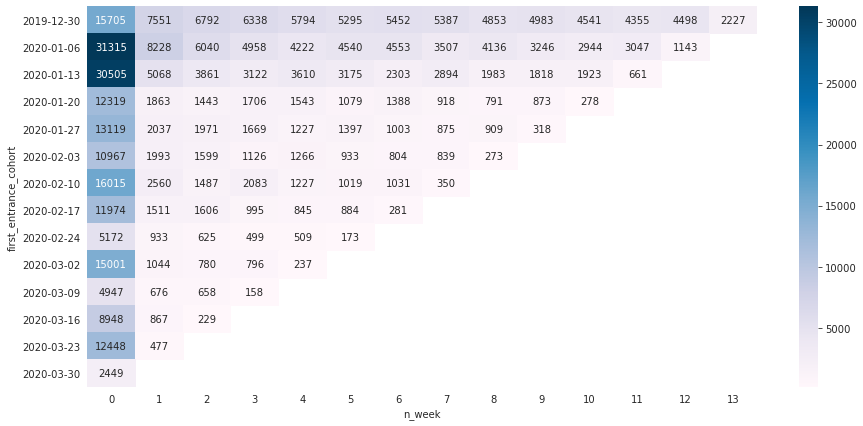

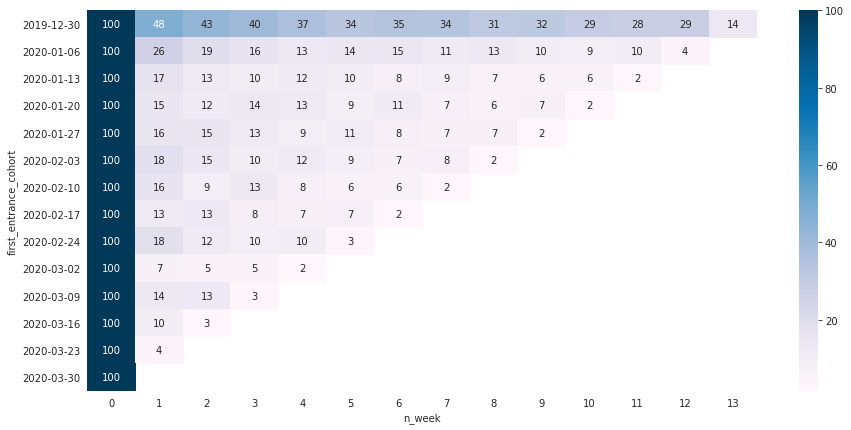

In [254]:
# Визуализируем датафрейм df2 с индексом первого входа по недельной когорте, столбцами: n_week, и значениями: device_id:
viz = df2.pivot_table(
            index = 'first_entrance_cohort',
            columns = 'n_week',
            values = 'device_id',
            aggfunc = pd.Series.nunique)

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (15, 7))
    ax = sns.heatmap(viz, annot = True, fmt = '.0f', cmap = 'PuBu');

viz = viz.apply(lambda x: x*100/viz[0])
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (15, 7))
    ax = sns.heatmap(viz, annot = True, fmt = '.0f', cmap = 'PuBu');

### 7 - вывод:

На графиках выше видно, что первая когорта (2019-12-30) является самой большой и самой активной, т.к. её выживаемость сравнительно больше, чем у других: начиная с 3-ей по 14-ую недели (n_week: с 2 по 13) - это 12 недель подряд, количество активных пользователей данной когорты превышает количество активных пользователей в других когортах. 
На втором графике, показатели активности пользователей по всем когортам в 1-ой недели (n_week = 0) используются как базовые - 100%, а показатели активности пользователей всех остальных недель делятся на показатели базовой - таким образом, лучше визуализирована активность/выживаемость каждой когорты.


Заметка: при построении данных недельных когорт, точкой отсчёта является неделя первого посещения.

### 8: 
##### Таблица когорт (в абс. и %) по неделе первой покупки, выбор самой активной когорты и анализ динамики активности.

> В данном расчёте, точкой отсчёта при построении недельных когорт является: неделя первой покупки (first_purchase_cohort).

In [258]:
# Создаём переменную с данными пользователей, сделавших покупки - избавляемся от дубликатов по device_id:
purchases = df2[df2.event == 'purchase'].sort_values('date').drop_duplicates('device_id')
# Добавляем столбец с данными первой покупки:
df2['first_purchase'] = df2['device_id'].map(purchases.set_index('device_id')['date'])
# Добавляем столбец с временем первой покупки:
df2['first_purchase'] = pd.to_datetime(df2['first_purchase'], format = '%Y-%m-%d')
# Создаём новый датафрейм с данными пользователей, имеющих не пустые значения даты первой покупки:
df3 = df2[-df2['first_purchase'].isna()]
df3['first_purchase_cohort'] = df3['first_purchase'].apply(lambda x: x + dt.timedelta(days = -x.weekday(), weeks = 0))
df3['date'] = pd.to_datetime(df3['date'], format = '%Y-%m-%d')
df3['n_week'] = df3['date'] - df3['first_purchase_cohort']
df3['n_week'] = df3['n_week'].apply(lambda x: x.days // 7)
df3['first_purchase_cohort'] = df3['first_purchase_cohort'].apply(lambda x: str(x)[:10])
df3 = df3[df3['event'] == 'purchase']
df3.groupby('first_purchase_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False)

,first_purchase_cohort,LTV
1,2020-01-06,19787838.0
2,2020-01-13,18852452.0
0,2019-12-30,12320177.5
3,2020-01-20,9018049.5
4,2020-01-27,7432634.0
6,2020-02-10,6766314.0
5,2020-02-03,6305237.0
7,2020-02-17,5398837.5
9,2020-03-02,3629773.0
8,2020-02-24,3067633.5


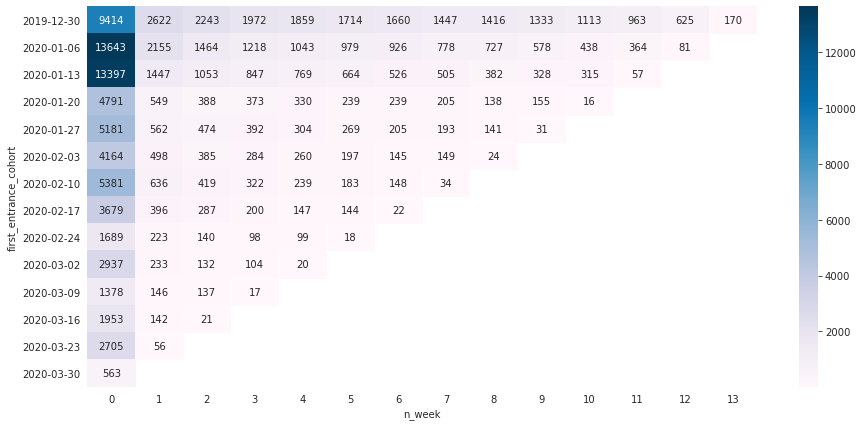

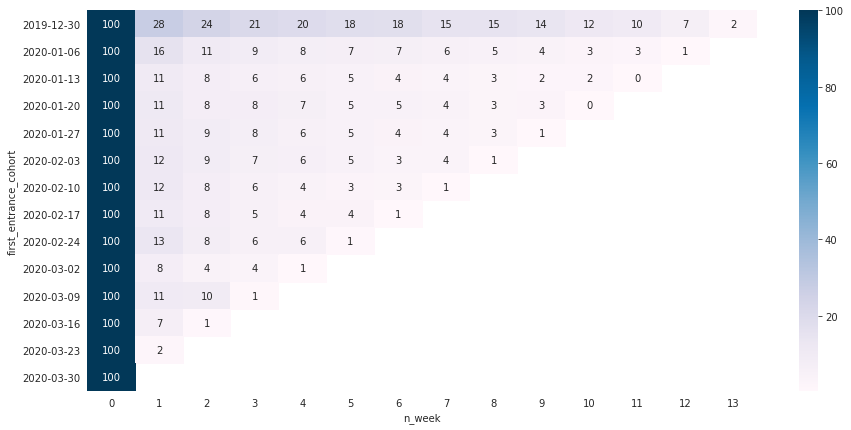

In [260]:
# Визуализируем датафрейм df3 с индексом первого входа по недельной когорте, столбцами: n_week, и значениями: device_id:
viz2 = df3.pivot_table(
            index = 'first_entrance_cohort',
            columns = 'n_week',
            values = 'device_id',
            aggfunc = pd.Series.nunique)

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (15, 7))
    ax = sns.heatmap(viz2, annot = True, fmt = '.0f', cmap = 'PuBu');

viz2 = viz2.apply(lambda x: x*100/viz2[0])
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (15, 7))
    ax = sns.heatmap(viz2, annot = True, fmt = '.0f', cmap = 'PuBu');

### 8 - вывод:

На графиках выше видно, что первая когорта (2019-12-30) снова является самой активной: начиная с 2-ой по 14-ую недели (n_week: с 1 по 13) - это уже 13 недель подряд (т.е. на 1 неделю больше, чем в когортах с первым посещением в качестве точки отсчёта),  количество активных пользователей данной когорты превышает количество активных пользователей в других когортах. Однако, общая активность пользователей во всех когортах значительно снизилась - в 2-3 раза и более, по сравнению с динамикой активности когорт с первым посещением в качестве точки отсчёта.


Заметка: при построении данных недельных когорт, точкой отсчёта является неделя первой покупки.

### 9: 
##### Расчёт среднего/медианного чека по когортам (недели первой покупки) в каждую неделю с момента первой покупки, указание диапазонов.

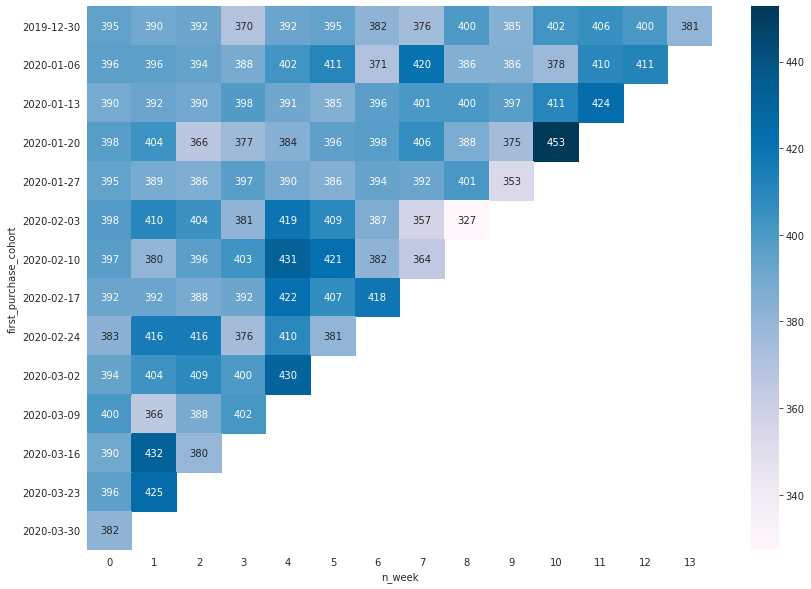

In [261]:
# Визуализируем динамику изменения среднего/медианного чека по когортам (недели первой покупки), используем датафрейм df3:
viz3 = df3.pivot_table(
                index = 'first_purchase_cohort',
                columns = 'n_week',
                values = 'purchase_sum',
                aggfunc = np.median)
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (14, 10))
    ax = sns.heatmap(viz3, annot = True, fmt = '.0f', cmap = 'PuBu')

### 9 - вывод:

На графике выше видно как меняется средний/медианный чек по каждой когорте, на протяжении их недельной активности. Например, у первой когорты (2019-12-30), минимальный и максимальный средний чек составляет: 370 и 406, соответственно, а у четвёртой когорты (2020-01-20), минимальный и максимальный средний чек составляет: 366 и 453, соответственно.

### Основные выводы и рекомендации для маркетологов:


Маркетологам, можно попробовать: 
1. определить точки потенциального роста в предпразничные, праздничные, послепраздничные дни, когда активность резко снижается и проводить дополнительные маркетинговые кампании для удержания высокой активности на более продолжительный период;
2. определить триггеры, ведущие к увеличению динамики открытий приложений у пользователей из группы "Остальные"; 
3. привязать тестовые маркетинговые кампании не к сезонным датам (предпразничные, праздничные, послепразничные дни), а в другим повседневным датам; таким образом, можно протестировать гипотезу, что в сезонные даты активность пользователей выше, чем в обычные дни и перенаправить маркетинговые расходы с сезонных дат на обычные/не сезонные даты;
4. увеличить трафик с каналов привлечения: vk_ads и instagram_ads;
(yandex-direct: 29368, google_ads: 26286, vk_ads: 23189, instagram_ads: 20096, facebook_ads: 13916, referal: 9282)
5. оптимизировать сам процесс покупки, т.е. на шаге добавления товара в корзину, добавить опцию автоматической покупки или другое альтернативное решение, чтобы большая часть зарегистрированных пользователей не отваливалась на этапах покупки (конверсия purchase/tap_basket: 72%);
6. оптимизировать сам процесс регистрации, чтобы большая часть незарегистрированных пользователей не отваливалась на этапе регистрации и также подумать над возможностью добавления опции автоматической покупки или другого альтернативного решения для повышения конверсии на этапе покупки (конверсия purchase/tap_b: 54%): например, с текущего показателя 54% до как минимум 72% - это конверсия в покупку у зарегистрированных пользователей;
7. сократить расходы по худшиму каналу привлечения, такому как yandex-direct (конверсия в покупку: 31.75%), а при наличии маркетингового бюджета, нарастить расходы по лучшим каналам привлечения: реферальная программа (конверсия в покупку: 48.43%); facebook_ads (конверсия в покупку: 41.94%), vk_ads (конверсия в покупку: 41.07%);
8. учитывать ROMI (расчёты рентабельности инвестиций в маркетинг) для каждого канала привлечения и на основе показателей прибыльности каналов формировать рекламный бюджет будущих периодов: например, на следующий период можно выделить больше рекламных расходов на реферальную программу, т.к. ROI по реферальной программе составил 652.22%, что значительно превышает ROMI других каналов - возможно оптимизировать рекламные расходы отдельных кампаний с низким ROMI как google_ads: 22.15%;
9. провести дополнительный анализ сумм покупок в разрезе других критериев (платформ, пола, города пользователя) и извлечь инсайты из проведённого анализа (См. ниже >>> Дополнительный анализ сумм покупок в разрезе критериев...)

### Дополнительный анализ сумм покупок в разрезе критериев: платформ (os_name), пола (gender) и города (city) пользователя.

In [298]:
df3_ios = df3[df3.os_name == 'ios']
df3_and = df3[df3.os_name == 'android']

In [299]:
# IOS:
# Создаём переменную с данными пользователей, сделавших покупки - избавляемся от дубликатов по device_id:
purchases = df3_ios[df3_ios.event == 'purchase'].sort_values('date').drop_duplicates('device_id')
# Добавляем столбец с данными первой покупки:
df3_ios['first_purchase'] = df3_ios['device_id'].map(purchases.set_index('device_id')['date'])
# Добавляем столбец с временем первой покупки:
df3_ios['first_purchase'] = pd.to_datetime(df3_ios['first_purchase'], format = '%Y-%m-%d')
# Создаём новый датафрейм с данными пользователей, имеющих не пустые значения даты первой покупки:
df4_ios = df3_ios[-df3_ios['first_purchase'].isna()]
df4_ios['first_purchase_cohort'] = df4_ios['first_purchase'].apply(lambda x: x + dt.timedelta(days = -x.weekday(), weeks = 0))
df4_ios['date'] = pd.to_datetime(df4_ios['date'], format = '%Y-%m-%d')
df4_ios['n_week'] = df4_ios['date'] - df4_ios['first_purchase_cohort']
df4_ios['n_week'] = df4_ios['n_week'].apply(lambda x: x.days // 7)
df4_ios['first_purchase_cohort'] = df4_ios['first_purchase_cohort'].apply(lambda x: str(x)[:10])
df4_ios = df4_ios[df4_ios['event'] == 'purchase']
df4_ios.groupby('first_purchase_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False)

,first_purchase_cohort,LTV
1,2020-01-06,7816401.5
2,2020-01-13,7043246.5
0,2019-12-30,4318913.0
3,2020-01-20,3358473.0
6,2020-02-10,2837813.5
4,2020-01-27,2626120.0
5,2020-02-03,2386180.0
7,2020-02-17,2169483.5
9,2020-03-02,1641727.0
12,2020-03-23,1292728.5


In [300]:
# ANDROID:
# Создаём переменную с данными пользователей, сделавших покупки - избавляемся от дубликатов по device_id:
purchases = df3_and[df3_and.event == 'purchase'].sort_values('date').drop_duplicates('device_id')
# Добавляем столбец с данными первой покупки:
df3_and['first_purchase'] = df3_and['device_id'].map(purchases.set_index('device_id')['date'])
# Добавляем столбец с временем первой покупки:
df3_and['first_purchase'] = pd.to_datetime(df3_and['first_purchase'], format = '%Y-%m-%d')
# Создаём новый датафрейм с данными пользователей, имеющих не пустые значения даты первой покупки:
df4_and = df3_and[-df3_and['first_purchase'].isna()]
df4_and['first_purchase_cohort'] = df4_and['first_purchase'].apply(lambda x: x + dt.timedelta(days = -x.weekday(), weeks = 0))
df4_and['date'] = pd.to_datetime(df4_and['date'], format = '%Y-%m-%d')
df4_and['n_week'] = df4_and['date'] - df4_and['first_purchase_cohort']
df4_and['n_week'] = df4_and['n_week'].apply(lambda x: x.days // 7)
df4_and['first_purchase_cohort'] = df4_and['first_purchase_cohort'].apply(lambda x: str(x)[:10])
df4_and = df4_and[df4_and['event'] == 'purchase']
df4_and.groupby('first_purchase_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False)

,first_purchase_cohort,LTV
1,2020-01-06,11920987.0
2,2020-01-13,11782034.5
0,2019-12-30,7880161.5
3,2020-01-20,5664744.0
4,2020-01-27,4829599.5
6,2020-02-10,3967021.5
5,2020-02-03,3912547.5
7,2020-02-17,3234016.0
9,2020-03-02,2016161.5
8,2020-02-24,1828790.5


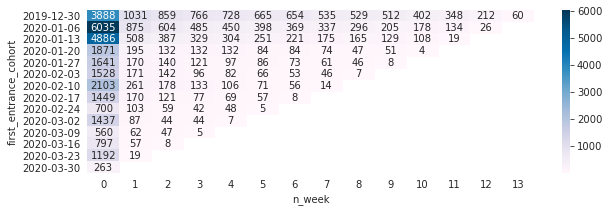

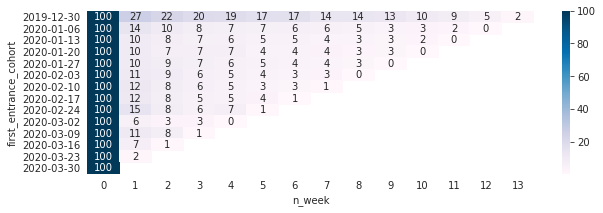

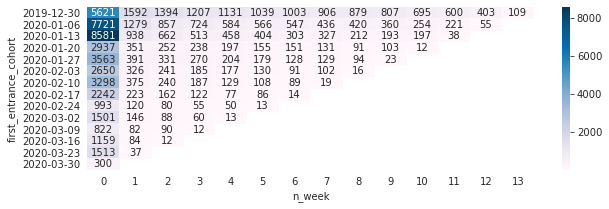

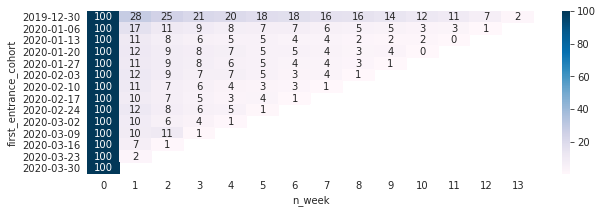

In [301]:
# IOS:
# Визуализируем датафрейм df4_ios с индексом первого входа по недельной когорте, столбцами: n_week, и значениями: device_id:
viz2_ios = df4_ios.pivot_table(
            index = 'first_entrance_cohort',
            columns = 'n_week',
            values = 'device_id',
            aggfunc = pd.Series.nunique)
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (10, 3))
    ax = sns.heatmap(viz2_ios, annot = True, fmt = '.0f', cmap = 'PuBu');
viz2_ios = viz2_ios.apply(lambda x: x*100/viz2_ios[0])
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (10, 3))
    ax = sns.heatmap(viz2_ios, annot = True, fmt = '.0f', cmap = 'PuBu');
    
# ANDROID:    
# Визуализируем датафрейм df4_and с индексом первого входа по недельной когорте, столбцами: n_week, и значениями: device_id:
viz2_and = df4_and.pivot_table(
            index = 'first_entrance_cohort',
            columns = 'n_week',
            values = 'device_id',
            aggfunc = pd.Series.nunique)
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (10, 3))
    ax = sns.heatmap(viz2_and, annot = True, fmt = '.0f', cmap = 'PuBu');
viz2_and = viz2_and.apply(lambda x: x*100/viz2_and[0])
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (10, 3))
    ax = sns.heatmap(viz2_and, annot = True, fmt = '.0f', cmap = 'PuBu');

In [305]:
display('Сумма всех покупок на платформах ios:        {}'.format(df3[df3.os_name == 'ios'].purchase_sum.sum()))
display('Сумма всех покупок на платформах android:    {}'.format(df3[df3.os_name == 'android'].purchase_sum.sum()))
display('Сумма всех покупок у мужского пола:          {}'.format(df3[df3.gender == 'male'].purchase_sum.sum()))
display('Сумма всех покупок у женского пола:          {}'.format(df3[df3.gender == 'female'].purchase_sum.sum()))
display('Сумма всех покупок в городе Москва:          {}'.format(df3[df3.city == 'Moscow'].purchase_sum.sum()))
display('Сумма всех покупок в городе Санкт-Петербург: {}'.format(df3[df3.city == 'Saint-Petersburg'].purchase_sum.sum()))

'Сумма всех покупок на платформах ios:        38741967.5'

'Сумма всех покупок на платформах android:    61514993.0'

'Сумма всех покупок у мужского пола:          46334201.5'

'Сумма всех покупок у женского пола:          53922759.0'

'Сумма всех покупок в городе Москва:          55472299.0'

'Сумма всех покупок в городе Санкт-Петербург: 44784661.5'

Общая сумма всех покупок: 100,256,960.5

Процент активности пользователей с платформами android и ios в когортах с 2 по 14 по отношению к базовой 1-ой когорте (n_week = 0) примерно одинаковый: например, первая когорта (2019-12-30) во 2-ую неделю (n_week = 1) у данных групп пользователей: 27 и 28, соответственно. Однако, размер недельных когорт у пользователей с платформами android выше чем у когорт пользователей с платформами ios: например, первая когорта (2019-12-30) во 2-ую неделю (n_week = 1) у данных групп пользователей: 1592 и 1031, соответственно.

Сумма всех покупок у мужчин - 46.22% меньше, чем сумма всех покупок у женщин - 53.78%.
Сумма всех покупок в городе Москва - 55.33% превышает сумму всех покупок в городе Санкт-Петербург - 44.67%.